In [3]:
def cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    # Compute the region codes for the two endpoints
    code1 = compute_region_code(x1, y1, xmin, ymin, xmax, ymax)
    code2 = compute_region_code(x2, y2, xmin, ymin, xmax, ymax)

    # The line is completely inside the clipping rectangle
    if code1 == 0 and code2 == 0:
        return x1, y1, x2, y2

    # The line is completely outside the clipping rectangle
    if code1 & code2 != 0:
        return None

    # Calculate the intersection point
    code_out = code1 if code1 != 0 else code2
    if code_out & TOP:
        x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
        y = ymax
    elif code_out & BOTTOM:
        x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
        y = ymin
    elif code_out & RIGHT:
        y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
        x = xmax
    elif code_out & LEFT:
        y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
        x = xmin
        
        # Update the endpoint of the line
    if code_out == code1:
        x1, y1 = x, y
    else:
        x2, y2 = x, y

    # Recursively clip the line
    return cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax)


def compute_region_code(x, y, xmin, ymin, xmax, ymax):
    code = INSIDE
    if x < xmin:
        code |= LEFT
    elif x > xmax:
        code |= RIGHT
    if y < ymin:
        code |= BOTTOM
    elif y > ymax:
        code |= TOP
    return code


# Region codes
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

In [4]:
cohen_sutherland(10, 10, 80, 80, 20, 20, 60, 60)

(20.0, 20, 60.0, 60)

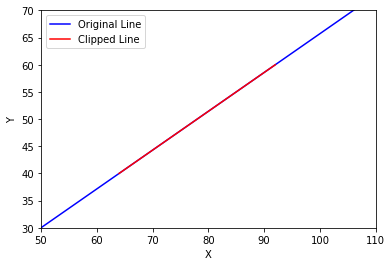

In [5]:
import matplotlib.pyplot as plt

def plot_clipped_line(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    # Clip the line segment using Cohen-Sutherland algorithm
    clipped_points = cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax)

    # Plot the original line
    plt.plot([x1, x2], [y1, y2], 'b', label='Original Line')

    # Plot the clipped line
    if clipped_points is not None:
        clipped_x1, clipped_y1, clipped_x2, clipped_y2 = clipped_points
        plt.plot([clipped_x1, clipped_x2], [clipped_y1, clipped_y2], 'r', label='Clipped Line')

    # Set the axis limits and labels
    plt.xlim([xmin-10, xmax+10])
    plt.ylim([ymin-10, ymax+10])
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add legend and show the plot
    plt.legend()
    plt.show()

# Example usage
x1, y1, x2, y2 = 50, 30, 120, 80
xmin, ymin, xmax, ymax = 60, 40, 100, 60
plot_clipped_line(x1, y1, x2, y2, xmin, ymin, xmax, ymax)
